In [5]:
import fastai
from fastai.text.all import *
import os
from PIL import Image
from pathlib import Path
import numpy as np
import seaborn as sns
from tqdm import tqdm
from matplotlib import pyplot as plt
import pickle
from collections import Counter
from seaborn import barplot
import shutil

In [6]:
PIXEL_BLOCKS_PATH = Path('/home/ibukey/ttmp/blocks-txt-v3/')

In [7]:
whitespace_tokenizer = BaseTokenizer()

In [8]:
data_loader = TextDataLoaders.from_folder(
    path=PIXEL_BLOCKS_PATH, 
    is_lm=True, valid_pct=0.1, 
    tok_tfm=whitespace_tokenizer)

Rules: []


In [9]:
learn = language_model_learner(
    data_loader, 
    AWD_LSTM, 
    metrics=[accuracy, Perplexity()], 
    path=str(PIXEL_BLOCKS_PATH), 
    pretrained=False,
    wd=0.1).to_fp16()

SuggestedLRs(valley=0.0002290867705596611)

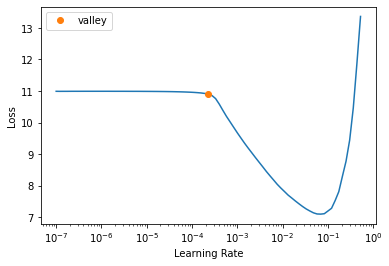

In [10]:
# learn.lr_find()

In [ ]:
lr = 2e-4

In [ ]:
learn.fit_one_cycle(1, lr)

In [ ]:
learn.unfreeze()
learn.fit_one_cycle(10, lr)

In [ ]:
learn.save('pixel-blocks-extra-margin')